## learning-AI101 : topic1_7

### tensor
- 텐서플로우에서 가장 기초적인 단위
- **matrix, vector**와 똑같은 기능 -> 따라서 행렬곱, 행렬합, 행렬차 다 가능. 내적도 가능. (SVD도 가능할듯?)
- https://velog.io/@skkumin/%ED%85%90%EC%84%9CTensor%EC%9D%98-%EC%9D%B4%ED%95%B4
-------

- 0차원 (상수만 담고 있음) : scala (rank = 0)
- 1차원 (row가 1개) : vector (rank = 1)
- 2차원 (row가 2개 이상) : matrix (rank = 2)
- 3차원부터는 nD tensor

In [1]:
import tensorflow as tf

2024-01-06 17:32:15.935499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
tensor = tf.constant(3) # scala
print (tensor)
print (tensor.shape) # scala니깐 차원이 없음

tf.Tensor(3, shape=(), dtype=int32)
()


In [34]:
tensor = tf.constant([1.0,2,3]) # vector
print (tensor)
print (tensor.shape) # vector니깐 차원 하나

# dtype : datatype, 보통은 실수로 tensor component를 이룸

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
(3,)


In [32]:
tensor = tf.constant([[1, 2, 3], # matrix
                     [4, 5, 6],
                     [7, 8, 9]])
print (tensor)
print (tensor.shape) # matrix니깐 차원 2개

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
(3, 3)


-------------

In [16]:
t1 = tf.constant([1,2,3])
t2 = tf.constant([4,5,6])

print(t1 + t2) # 행렬합 
print(t1 - t2) # 행렬차
print(t1 * t2) # 행렬곱 (이거랑 내적은 다름)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor([-3 -3 -3], shape=(3,), dtype=int32)
tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


In [17]:
t3 = tf.constant ([[1, 2], 
                   [3, 4]]) # 2차원 tensor == matrix

1) tensor 만들고 operator로 operand 연산시키기 (위처럼)
2) **tensorflow 내장 함수 사용**

In [19]:
print(tf.add(t1, t2)) # 행렬합
print(tf.subtract(t1, t2)) # 행렬차
print(tf.divide(t1, t2)) # 행렬나눗셈
print(tf.multiply(t1, t2)) # 행렬곱

tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor([-3 -3 -3], shape=(3,), dtype=int32)
tf.Tensor([0.25 0.4  0.5 ], shape=(3,), dtype=float64)
tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


In [27]:
tf.zeros (10) # 안의 수만큼 0으로 가득찬 vector 만들어줌

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [28]:
tf.zeros ([2, 2]) # 2행 2열의 0으로 가득찬 matrix 만들어줌

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

------------

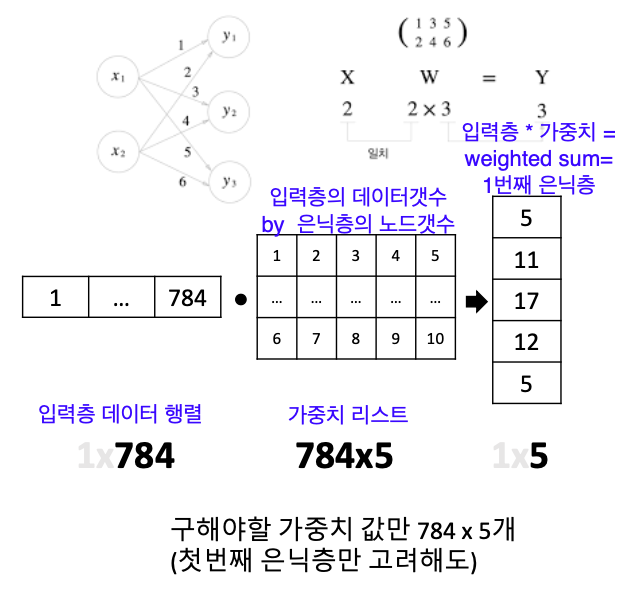

**weighted sum을 구할 때 내적 필수** & tensor 생성 시 2차원 리스트로 생성해야함 (matrix니깐)

In [ ]:
# 행렬의 내적 (dot product)

print(tf.matmul(t1, t2))

**위가 안되는거는 당연한거임. 곱셈을 하기 위해선 전행렬의 column의 갯수와 후행렬의 row의 갯수가 일치해야 함.**   
=> tf.transpose() 이용해서 transpose matrix 생성 가능

In [22]:
t1 = tf.constant([[1, 2, 3, 4, 5]])
t2 = tf.constant([[-1, -2, -3, -4, -5]])

t2 = tf.transpose(t2)

print (tf.matmul(t1, t2))

tf.Tensor([[-55]], shape=(1, 1), dtype=int32)


--------------

**weight를 저장하고 싶을 땐 variable을 만들면 됨** (variable은 constant에 비해 업데이트가 가능하니깐)  
constant는 변경 불가능, variable은 변경 가능

In [40]:
weight = tf.Variable(1.0)
print (weight)
print (weight.numpy()) # variable 안의 값을 return
weight.assign(5) # variable 안의 값을 변경
print (weight.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
1.0
5.0
